<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/6_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week #6 Wavelet transform

In [1]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg

--2024-09-20 16:56:22--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 74.125.196.139, 74.125.196.102, 74.125.196.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2024-09-20 16:56:22--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.001s  

2024-09-20 16:56:24 (57.4 MB/s) - ‘kitty.jpg’ saved [

In [2]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.3 MB/s eta 0:00:00


In [3]:
import pywt
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Example #1 part of kitty image

[[165.5 193. ]
 [127.5 174.5]]
[[11.5 11. ]
 [ 5.5  5.5]]
[[ -0.5 -13. ]
 [ -7.5 -11.5]]
[[-0.5  1. ]
 [ 0.5 -2.5]]


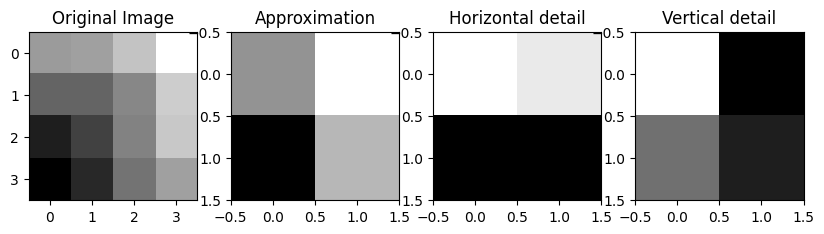

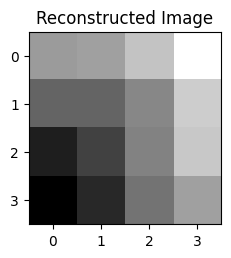

[[ 88.  89.  96. 108.]
 [ 77.  77.  84.  98.]
 [ 63.  70.  83.  97.]
 [ 57.  65.  80.  89.]]


In [4]:
sub_img = np.array([[88,89,96,108],
                    [77,77,84,98],
                    [63,70,83,97],
                    [57,65,80,89]])
LL1, (LH1, HL1, HH1) = pywt.dwt2(sub_img, 'haar')
print(LL1)
print(LH1)
print(HL1)
print(HH1)

plt.figure(figsize=(10,10))
plt.subplot(1, 4, 1)
plt.imshow(sub_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(LL1, cmap='gray')
plt.title('Approximation')

plt.subplot(1, 4, 3)
plt.imshow(LH1, cmap='gray')
plt.title('Horizontal detail')

plt.subplot(1, 4, 4)
plt.imshow(HL1, cmap='gray')
plt.title('Vertical detail')

plt.show()

recon_img = pywt.idwt2((LL1, (LH1, HL1, HH1)), 'haar')
plt.figure(figsize=(2.5,2.5))
plt.imshow(recon_img, cmap='gray')
plt.title('Reconstructed Image')
plt.show()
print(recon_img)

### Example #2 simple image

In [5]:
sub_img = np.array([[3,-1],
                    [6,2]])
LL1, (LH1, HL1, HH1) = pywt.dwt2(sub_img, 'haar') # wavelet function - mother wavelet
print(LL1)
print(LH1) # horizontal details
print(HL1)
print(HH1)

recon_img = pywt.idwt2((LL1, (LH1, HL1, HH1)), 'haar')
print(recon_img)

[[5.]]
[[-3.]]
[[4.]]
[[0.]]
[[ 3. -1.]
 [ 6.  2.]]


## Exercise #1 use pywavelets for image space-frequency analysis
* apply wavelet transform into ”kitty.jpg” image
* Investigate the size of the original image, approximation, horizontal, vertical and diagonal details.
* Investigate the min/max values in the approximation, horizontal, vertical and diagonal details.
* Try with different mother wavelets

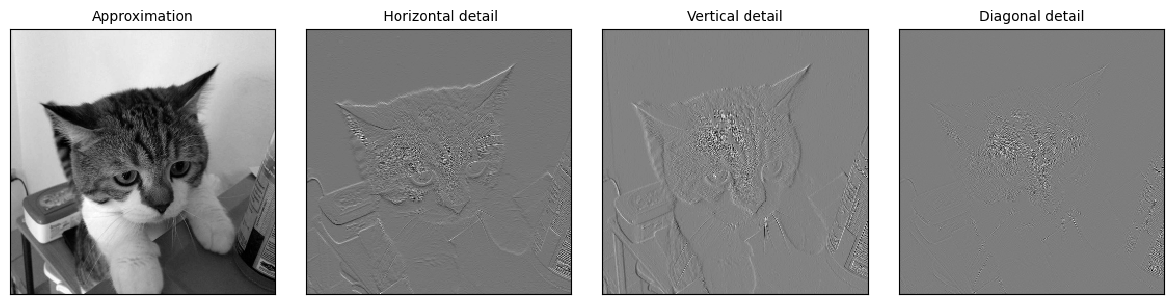

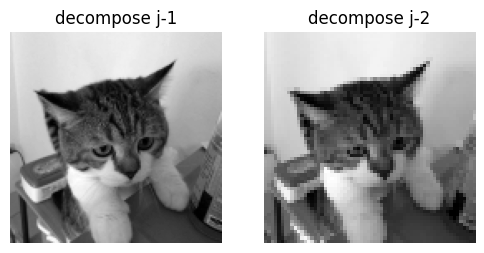

In [6]:
import pywt
import cv2
import matplotlib.pyplot as plt
original = cv2.imread("kitty.jpg",0)
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


plt.figure(figsize=(6,3))
# TO DO : Try to decompose the J-1 th layer
coeffs2_LL = pywt.dwt2(LL, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2_LL

plt.subplot(1, 2, 1)
plt.imshow(LL2, cmap='gray')
plt.axis('off')
plt.title('decompose j-1')



# TO DO : Try to decompose the J-2 th layer
coeffs2_LL2 = pywt.dwt2(LL2, 'haar')
LL3, (LH3, HL3, HH3) = coeffs2_LL2

plt.subplot(1, 2, 2)
plt.imshow(LL3, cmap='gray')
plt.title('decompose j-2')
plt.axis('off')

plt.show()


## Exercise #2 Can you segment the Cat?
* Apply wavelet transform into ”kitty.jpg” image
* Again, investigate the min/max values in the approximation, horizontal, vertical and diagonal details.
* Can you select a threshold value to separate the high details from the low and segment the cat out?


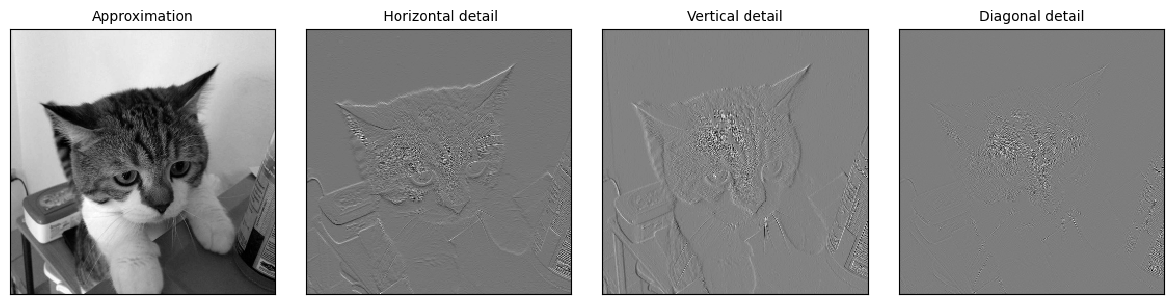

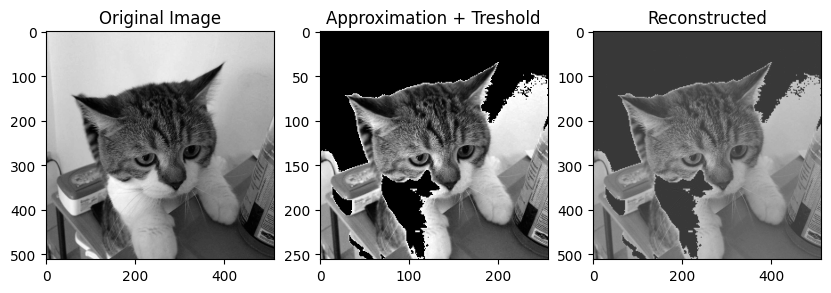

In [18]:
original = cv2.imread("kitty.jpg",0)
LL, (LH, HL, HH) = pywt.dwt2(original, 'haar')
fig = plt.figure(figsize=(12, 3))

for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

# TO DO : use wavelet details to segment the cat
threshold = 280  # Example threshold, adjust based on the image
cH_thresh = np.where(np.abs(LH) < threshold, LH, 0)
cV_thresh = np.where(np.abs(HL) < threshold, HL, 0)
cD_thresh = np.where(np.abs(HH) < threshold, HH, 0)

LL = np.where(np.abs(LL) < threshold, LL, 0)

reconstructed_img = pywt.idwt2((LL, (cH_thresh, cV_thresh, cD_thresh)), 'haar')

plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(original,cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(LL,cmap='gray'), plt.title('Approximation + Treshold')
plt.subplot(133), plt.imshow(reconstructed_img,cmap='gray'), plt.title('Reconstructed')
plt.show()

